Mean Error: 0.36
R-squared: 0.47


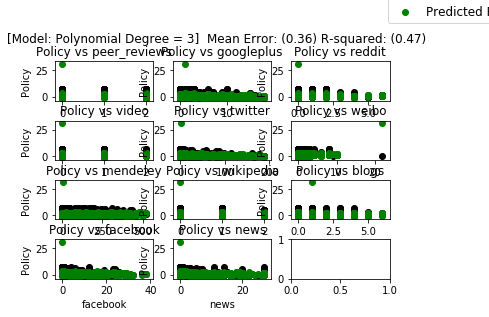

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00         0
          0       0.88      0.99      0.93     18038
          1       0.79      0.80      0.80     10499
          2       0.19      0.02      0.04      1651
          3       0.00      0.00      0.00       475
          4       0.00      0.00      0.00       197
          5       0.00      0.00      0.00        96
          6       0.00      0.00      0.00        48
          7       0.00      0.00      0.00        36
         31       0.00      0.00      0.00         0

avg / total       0.79      0.85      0.81     31040



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [3]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sb
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report

# dataset file
filename = ('cleanseddata.csv')
col_headers = 'altmetric_id mendeley    citeulike   connotea    twitter reddit  facebook    googleplus  blogs   news    video   wikipedia   q&a pinterest   weibo   peer_reviews    policy'
col_headers = col_headers.split()
tmp = {}
for i in range(len(col_headers)):
    tmp[col_headers[i]] = i
col_headers_index = tmp

#parameters
src_col_label = ['peer_reviews', 'googleplus', 'reddit', 'video', 'twitter', 'weibo', 'mendeley', 'wikipedia', 'blogs',
                 'facebook', 'news']
sournce_columns = [col_headers_index[col_label] for col_label in src_col_label]

target_column = [col_headers_index['policy']]

percent_train_data = 80

# Load the mydataset mydataset
all_dataset = pd.read_csv(filename)

# remove the outliers
all_dataset = all_dataset[(np.abs(stats.zscore(all_dataset)) < 3).all(axis=1)]


# shuffle data
all_dataset = all_dataset.sample(frac=1)
all_dataset = all_dataset.sample(frac=1)
all_dataset = all_dataset.sample(frac=1)
all_dataset = all_dataset.sample(frac=1)
all_dataset = all_dataset.sample(frac=1)

no_train_data = int(percent_train_data * float(len(all_dataset)) / 100.0)
#print('Percent of train data %d : %d / %d' % (percent_train_data, no_train_data, len(all_dataset)))
pd_data = all_dataset.iloc[:, sournce_columns]
pd_target = all_dataset.iloc[:, target_column]

pd_all = all_dataset.iloc[:, (sournce_columns + target_column)]
mydataset = datasets.base.Bunch(data=pd_data, target=pd_target)
#print('type(mydataset) ==> ', type(mydataset))
#print(mydataset.data[:10])
#print(mydataset.target[:10])


mydataset_X = mydataset.data

# generate a model of polynomial features
dof = 3
poly = PolynomialFeatures(degree=dof)
mydataset_X = poly.fit_transform(mydataset_X)

# Split the data into training/testing sets
mydataset_X_train = mydataset_X[:no_train_data]
mydataset_X_test = mydataset_X[no_train_data:]

# Split the targets into training/testing sets
mydataset_y_train = mydataset.target[:no_train_data]
mydataset_y_test = mydataset.target[no_train_data:]

#Linear Regression


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(mydataset_X_train, mydataset_y_train)

#Make predictions using the testing set
mydataset_y_pred = regr.predict(mydataset_X_test)

# The coefficients
#print('Coefficients: %s' % str(regr.coef_))

# The Mean Error
mse = mean_squared_error(mydataset_y_test, mydataset_y_pred)
print("Mean Error: %.2f" % mse)

# Explained variance score: 1 is perfect prediction
var_score = r2_score(mydataset_y_test, mydataset_y_pred)
print('R-squared: %.2f' % var_score)


def get_ith_column_of_dataframe(df, i, frm_row=0, to_row=None):
    '''
    Returns the i-th column of a pandas dataframe from frm_row to to_row
    '''
    if to_row is None:
        to_row = len(df)
    return [row[0] for row in df.iloc[:, [i]].values.tolist()][frm_row: to_row]


def get_it_column_of_skl_bunch(bunch, i, frm_row=0, to_row=None):
    '''
    Returns the i-th column of a sklearn Bunch from frm_row to to_row
    '''
    if to_row is None:
        to_row = len(bunch)
    return [row[i] for row in bunch[frm_row: to_row]]


def main():
    ax_nrow = 4
    ax_ncol = 3

    plt.close('all')

    f, ax = plt.subplots(ax_nrow, ax_ncol)
    idx = 0
    for i in sournce_columns:
        ix = int(idx / ax_ncol)
        jx = idx % ax_ncol

        # print (i, ix, jx)

        mydataset_X_test_1D = get_ith_column_of_dataframe(all_dataset, i, frm_row=no_train_data)
        mydataset_y_test_1D = get_ith_column_of_dataframe(all_dataset, target_column[0], frm_row=no_train_data)
        sc1 = ax[ix, jx].scatter(mydataset_X_test_1D, mydataset_y_test_1D, color='black')

        # print (mydataset_X_test[:10])
        # print (mydataset_y_test[:10])

        # draw the regression line for each line
        # fig = plt.figure()
        # ax = fig.add_subplot(111)

        ax[ix, jx].set_xlabel(col_headers[i])
        ax[ix, jx].set_ylabel('Policy')
        ax[ix, jx].set_title('Policy vs %s' % (col_headers[i],))

        # Report the Mean Error on the graphs
        result_value = 'Coefficients: %.2f ' % regr.coef_[0][idx]

        mydataset_y_pred_1D = get_it_column_of_skl_bunch(mydataset_y_pred, 0)
        max_y = max(mydataset_y_test_1D + mydataset_y_pred_1D) * 0.9
        max_x = max(mydataset_X_test_1D) * 0.6

        sc2 = ax[ix, jx].scatter(mydataset_X_test_1D, mydataset_y_pred_1D, color='green')

        idx += 1

    f.suptitle('[Model: Polynomial Degree = %d]  Mean Error: (%.2f) R-squared: (%.2f)' % (dof, mse, var_score))
    axbox = ax[0, 2].get_position()
    x_value, y_value = (0.12, 0.21)
    f.legend([sc1, sc2], ["Observed Policy", "Predicted Policy"], loc=(axbox.x0 + x_value, axbox.y0 + y_value),
             fontsize=12)

    f.subplots_adjust(hspace=.5)

    plt.show()


main()

print(classification_report(mydataset_y_test, mydataset_y_pred.astype(int)))
